In [1]:
import os
import csv
import pandas as pd
import io
import matplotlib.pyplot as plt


In [2]:
datafile = ( "merged_all_data.csv")
file = pd.read_csv(datafile)

datafile = ( "../clean_data/Output/all_salesdata.csv")
df = pd.read_csv(datafile)

In [3]:
file

,NAICS Code,Description,Employment_2000,Establishments_2000,Employment_2001,Establishments_2001,Employment_2002,Establishments_2002,Employment_2003,Establishments_2003,...,Employment_2011,Establishments_2011,Employment_2012,Establishments_2012,Employment_2013,Establishments_2013,Employment_2014,Establishments_2014,Employment_2015,Establishments_2015
0,442,Furniture and Home Furnishings Stores,"549,184","64,842","567,318","65,766","551,567","66,360","560,717","65,393",...,"424,221","52,703","422,595","51,645","426,855","51,103","426,855","51,103","445,240","50,336"
1,443,Electronics and Appliance Stores,"407,321","45,592","425,736","47,747","418,725","49,600","419,321","47,746",...,"434,297","49,068","428,298","49,684","408,456","47,998","408,456","47,998","407,409","46,731"
2,4451,Grocery Stores,"2,716,868","98,275","2,665,804","99,357","2,569,351","97,166","2,594,727","96,964",...,"2,542,436","93,282","2,582,042","91,530","2,606,330","93,590","2,606,330","93,590","2,800,048","95,514"
3,448,Clothing and Clothing Accessories Stores,"1,368,665","150,946","1,392,626","151,668","1,408,948","151,895","1,467,427","148,012",...,"1,659,696","148,084","1,630,575","147,436","1,710,141","146,350","1,710,141","146,350","1,711,022","146,694"


In [4]:
df

,Year,shopping_sales,furniture_sales,electronic_sales,grocery_sales
0,2000,167112.0,91198.0,90369.0,401587.0
1,2001,167593.0,91480.0,88009.0,418561.0
2,2002,172308.0,94468.0,91188.0,420292.0
3,2003,178417.0,96619.0,92505.0,428342.0
4,2004,189393.0,103327.0,99637.0,439949.0
5,2005,200194.0,109069.0,106128.0,457697.0
6,2006,212950.0,113119.0,110105.0,472130.0
7,2007,221587.0,111410.0,110258.0,491835.0
8,2008,216971.0,98844.0,108827.0,510355.0
9,2009,204773.0,84876.0,98067.0,510394.0


In [5]:
df2=df.astype(int)

In [6]:
df2.dtypes

Year                int64
shopping_sales      int64
furniture_sales     int64
electronic_sales    int64
grocery_sales       int64
dtype: object

In [7]:
cleaner_df = file.drop(columns=['NAICS Code'])
employment_df = cleaner_df[['Description','Employment_2000','Employment_2001','Employment_2002','Employment_2003','Employment_2004',
                          'Employment_2005','Employment_2006','Employment_2007','Employment_2008','Employment_2009',
                          'Employment_2010','Employment_2011','Employment_2012','Employment_2013','Employment_2014','Employment_2015']]
establishment_df = cleaner_df[['Description','Establishments_2000','Establishments_2001','Establishments_2002','Establishments_2003',
                             'Establishments_2004','Establishments_2005','Establishments_2006','Establishments_2007','Establishments_2008',
                             'Establishments_2009','Establishments_2010','Establishments_2011','Establishments_2012','Establishments_2013',
                             'Establishments_2014','Establishments_2015']]
establishment_df = establishment_df.transpose()
establishment_df.columns = establishment_df.iloc[0]
establishment_df = establishment_df.drop(establishment_df.index[0])
establishment_df

# employment_df = employment_df.transpose()
# employment_df.columns = employment_df.iloc[0]
# employment_df = employment_df.drop(employment_df.index[0])
# employment_df


Description,Furniture and Home Furnishings Stores,Electronics and Appliance Stores,Grocery Stores,Clothing and Clothing Accessories Stores
Establishments_2000,"64,842","45,592","98,275","150,946"
Establishments_2001,"65,766","47,747","99,357","151,668"
Establishments_2002,"66,360","49,600","97,166","151,895"
Establishments_2003,"65,393","47,746","96,964","148,012"
Establishments_2004,"65,728","49,020","96,130","149,831"
Establishments_2005,"66,396","50,176","95,929","150,580"
Establishments_2006,"65,854","49,323","94,176","152,021"
Establishments_2007,"65,485","52,470","92,315","155,371"
Establishments_2008,"61,735","49,173","89,054","155,578"
Establishments_2009,"57,478","48,489","90,259","150,205"


In [8]:
establishment_df.columns = ['Furniture', 'Electronics',"Grocery","Clothing"]
establishment_df

,Furniture,Electronics,Grocery,Clothing
Establishments_2000,"64,842","45,592","98,275","150,946"
Establishments_2001,"65,766","47,747","99,357","151,668"
Establishments_2002,"66,360","49,600","97,166","151,895"
Establishments_2003,"65,393","47,746","96,964","148,012"
Establishments_2004,"65,728","49,020","96,130","149,831"
Establishments_2005,"66,396","50,176","95,929","150,580"
Establishments_2006,"65,854","49,323","94,176","152,021"
Establishments_2007,"65,485","52,470","92,315","155,371"
Establishments_2008,"61,735","49,173","89,054","155,578"
Establishments_2009,"57,478","48,489","90,259","150,205"


In [9]:
establishment_df.Furniture=pd.to_numeric(establishment_df.Furniture.str.replace(',',''), errors = 'coerce')
establishment_df.Electronics=pd.to_numeric(establishment_df.Electronics.str.replace(',',''), errors = 'coerce')
establishment_df.Grocery=pd.to_numeric(establishment_df.Grocery.str.replace(',',''), errors = 'coerce')
establishment_df.Clothing=pd.to_numeric(establishment_df.Clothing.str.replace(',',''), errors = 'coerce')

In [10]:
establishment_df

,Furniture,Electronics,Grocery,Clothing
Establishments_2000,64842,45592,98275,150946
Establishments_2001,65766,47747,99357,151668
Establishments_2002,66360,49600,97166,151895
Establishments_2003,65393,47746,96964,148012
Establishments_2004,65728,49020,96130,149831
Establishments_2005,66396,50176,95929,150580
Establishments_2006,65854,49323,94176,152021
Establishments_2007,65485,52470,92315,155371
Establishments_2008,61735,49173,89054,155578
Establishments_2009,57478,48489,90259,150205


In [11]:
v=establishment_df["Furniture"]
v

Establishments_2000    64842
Establishments_2001    65766
Establishments_2002    66360
Establishments_2003    65393
Establishments_2004    65728
Establishments_2005    66396
Establishments_2006    65854
Establishments_2007    65485
Establishments_2008    61735
Establishments_2009    57478
Establishments_2010    54929
Establishments_2011    52703
Establishments_2012    51645
Establishments_2013    51103
Establishments_2014    51103
Establishments_2015    50336
Name: Furniture, dtype: int64

In [12]:
s=df2["shopping_sales"]
s

0     167112
1     167593
2     172308
3     178417
4     189393
5     200194
6     212950
7     221587
8     216971
9     204773
10    213060
11    227915
12    238766
13    244786
14    250287
15    255737
Name: shopping_sales, dtype: int64

In [13]:
t=pd.DataFrame(v)
t

,Furniture
Establishments_2000,64842
Establishments_2001,65766
Establishments_2002,66360
Establishments_2003,65393
Establishments_2004,65728
Establishments_2005,66396
Establishments_2006,65854
Establishments_2007,65485
Establishments_2008,61735
Establishments_2009,57478


In [14]:
establishment_df= establishment_df.reset_index()
establishment_df

,index,Furniture,Electronics,Grocery,Clothing
0,Establishments_2000,64842,45592,98275,150946
1,Establishments_2001,65766,47747,99357,151668
2,Establishments_2002,66360,49600,97166,151895
3,Establishments_2003,65393,47746,96964,148012
4,Establishments_2004,65728,49020,96130,149831
5,Establishments_2005,66396,50176,95929,150580
6,Establishments_2006,65854,49323,94176,152021
7,Establishments_2007,65485,52470,92315,155371
8,Establishments_2008,61735,49173,89054,155578
9,Establishments_2009,57478,48489,90259,150205


In [15]:
establishment_df['Furniture Sales per Store'] = establishment_df["Furniture"]/df["furniture_sales"]*100
establishment_df['Electronic Sales per Store'] = establishment_df["Electronics"]/df["electronic_sales"]*100
establishment_df['Grocery Sales per Store'] = establishment_df["Grocery"]/df["grocery_sales"]*100
establishment_df['Clothing Sales per Store'] = establishment_df["Clothing"]/df["shopping_sales"]*100
establishment_df

,index,Furniture,Electronics,Grocery,Clothing,Furniture Sales per Store,Electronic Sales per Store,Grocery Sales per Store,Clothing Sales per Store
0,Establishments_2000,64842,45592,98275,150946,71.100243,50.450929,24.471659,90.326248
1,Establishments_2001,65766,47747,99357,151668,71.891124,54.252406,23.737759,90.497813
2,Establishments_2002,66360,49600,97166,151895,70.246009,54.393122,23.118689,88.153191
3,Establishments_2003,65393,47746,96964,148012,67.681305,51.614507,22.637052,82.958462
4,Establishments_2004,65728,49020,96130,149831,63.611641,49.198591,21.850260,79.111160
5,Establishments_2005,66396,50176,95929,150580,60.875226,47.278758,20.959062,75.217039
6,Establishments_2006,65854,49323,94176,152021,58.216568,44.796331,19.947048,71.388119
7,Establishments_2007,65485,52470,92315,155371,58.778386,47.588384,18.769506,70.117381
8,Establishments_2008,61735,49173,89054,155578,62.457003,45.184559,17.449422,71.704514
9,Establishments_2009,57478,48489,90259,150205,67.719968,49.444767,17.684181,73.351956


In [16]:
x_axis = df.Year
clothing_sales = establishment_df["Clothing Sales per Store"]
furniture_sales = establishment_df["Furniture Sales per Store"]
electronic_sales = establishment_df["Electronic Sales per Store"]
grocery_sales = establishment_df["Grocery Sales per Store"]

clothing_emp = establishment_df["Clothing"]
furniture_emp = establishment_df["Furniture"]
electronic_emp = establishment_df["Electronics"]
grocery_emp = establishment_df["Grocery"]

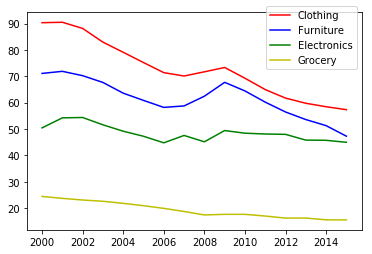

In [17]:
plt.plot(x_axis,clothing_sales,color='r',label='Clothing')
plt.plot(x_axis,furniture_sales,color='b',label='Furniture')
plt.plot(x_axis,electronic_sales,color='g',label='Electronics')
plt.plot(x_axis,grocery_sales,color='y',label='Grocery')
plt.legend(loc="best",bbox_to_anchor=(1, 1.05))

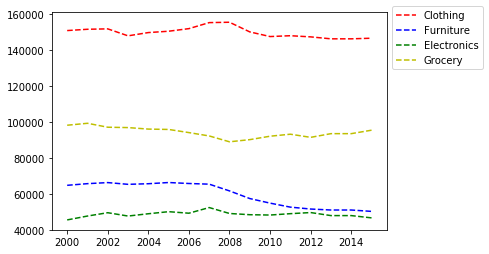

In [18]:
plt.plot(x_axis,clothing_emp,'r--',label='Clothing')
plt.plot(x_axis,furniture_emp,'b--',label='Furniture')
plt.plot(x_axis,electronic_emp,'g--',label='Electronics')
plt.plot(x_axis,grocery_emp,'y--',label='Grocery')
plt.legend(loc="best",bbox_to_anchor=(1, 1.05))

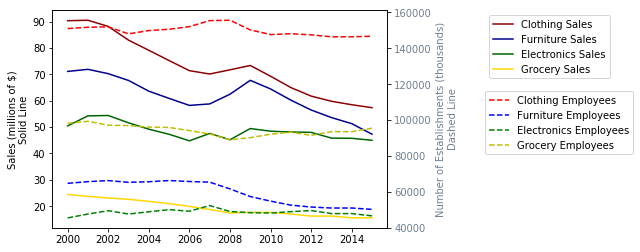

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_axis,clothing_sales,color='darkred',label='Clothing Sales')
ax1.plot(x_axis,furniture_sales,color='darkblue',label='Furniture Sales')
ax1.plot(x_axis,electronic_sales,color='darkgreen',label='Electronics Sales')
ax1.plot(x_axis,grocery_sales,color='gold',label='Grocery Sales')
ax1.set_ylabel('Sales (millions of $)\nSolid Line')
plt.legend(loc="best",bbox_to_anchor=(1.68, 1))


ax2 = ax1.twinx()
ax2.plot(x_axis,clothing_emp,'r--',label='Clothing Employees')
ax2.plot(x_axis,furniture_emp,'b--',label='Furniture Employees')
ax2.plot(x_axis,electronic_emp,'g--',label='Electronics Employees')
ax2.plot(x_axis,grocery_emp,'y--',label='Grocery Employees')
plt.legend(loc="best",bbox_to_anchor=(1.75, .65))

ax2.set_ylabel('Number of Establishments (thousands)\nDashed Line', color='slategrey')
for tl in ax2.get_yticklabels():
    tl.set_color('slategrey')